In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_fscore_support
import matplotlib.pyplot as plt

In [13]:
# No training phase just find eucludidean distance of all points and take top k and assign majority class as prediction

In [14]:
def knn_predict(k, X_train, x, y_train):
  distances = np.array([ [np.linalg.norm(x - xi), yi] for xi, yi in zip(X_train, y_train)])
  distances = distances[np.argsort(distances[:, 0])]
  label_counts = dict()
  
  for distance in distances[:k]:
    label = distance[1]

    if label in label_counts:
      label_counts[label] = 1 + label_counts[label]
    
    else:
      label_counts[label] = 0
  
  return max(label_counts, key=label_counts.get)

In [15]:
# print all metics, also return the accuracy
def get_metrics(X_train, y_train, X_test, y_test, k):
  y_pred = [ knn_predict(k, X_train, x, y_train) for x in X_test ]
  print("Accuracy score " , accuracy_score(y_test, y_pred))
  print("precision_recall_fscore_support\n", precision_recall_fscore_support(y_test, y_pred))
  print("auc score ", roc_auc_score(y_test, y_pred))
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  print("fpr - ", fpr)
  print("tpr - ", tpr)
  fig, ax = plt.subplots(1)
  ax.plot(fpr, tpr)
  plt.show()

  return accuracy_score(y_test, y_pred)

In [16]:
df = pd.read_csv('data.csv')
df.head()
# 0 - B   1 - M
y = df['diagnosis'].map({'M': 1, 'B' : 0}).to_numpy()
df.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1, inplace=True)
X = df.to_numpy()

In [19]:
# k fold cross validation, k = 5
# so
def k_cross_validate(X, y, k):
  print("k = ", k)
  size = X.shape[0]
  fold_size = size // 5
  avg_acc = 0
  for i in range(5):
    X_train = X
    y_train = y
    extra_fold_size = 0
    if i == 5:
      extra_fold_size = size % k

    start = i * fold_size
    end = (i + 1) * (fold_size) + extra_fold_size
    X_test = X[ start : end ]
    y_test = y[ start : end ]

    current_fold_index = np.arange(start, end - 1, 1)
    np.delete(X_train, current_fold_index, 0)
    np.delete(y_train, current_fold_index, 0)

    avg_acc = avg_acc + get_metrics(X_train, y_train, X_test, y_test, k) / 5

  print("K Fold Cross Validation avg accuracy for k = ", k, " ", avg_acc)
  return avg_acc

k =  5
Accuracy score  0.9026548672566371
precision_recall_fscore_support
 (array([0.81481481, 0.98305085]), array([0.97777778, 0.85294118]), array([0.88888889, 0.91338583]), array([45, 68]))
auc score  0.915359477124183
fpr -  [0.         0.02222222 1.        ]
tpr -  [0.         0.85294118 1.        ]


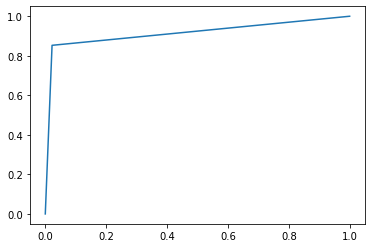

Accuracy score  0.9292035398230089
precision_recall_fscore_support
 (array([0.92424242, 0.93617021]), array([0.953125  , 0.89795918]), array([0.93846154, 0.91666667]), array([64, 49]))
auc score  0.9255420918367347
fpr -  [0.       0.046875 1.      ]
tpr -  [0.         0.89795918 1.        ]


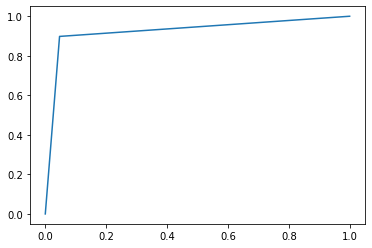

Accuracy score  0.9823008849557522
precision_recall_fscore_support
 (array([0.98648649, 0.97435897]), array([0.98648649, 0.97435897]), array([0.98648649, 0.97435897]), array([74, 39]))
auc score  0.9804227304227305
fpr -  [0.         0.01351351 1.        ]
tpr -  [0.         0.97435897 1.        ]


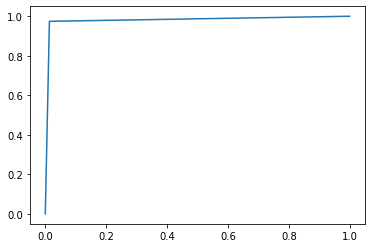

Accuracy score  0.9557522123893806
precision_recall_fscore_support
 (array([0.95348837, 0.96296296]), array([0.98795181, 0.86666667]), array([0.9704142, 0.9122807]), array([83, 30]))
auc score  0.9273092369477911
fpr -  [0.         0.01204819 1.        ]
tpr -  [0.         0.86666667 1.        ]


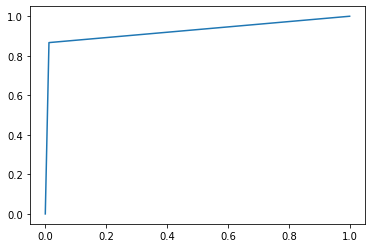

Accuracy score  0.9646017699115044
precision_recall_fscore_support
 (array([0.98863636, 0.88      ]), array([0.96666667, 0.95652174]), array([0.97752809, 0.91666667]), array([90, 23]))
auc score  0.9615942028985507
fpr -  [0.         0.03333333 1.        ]
tpr -  [0.         0.95652174 1.        ]


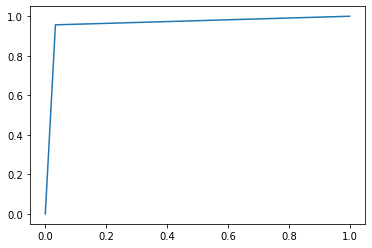

K Fold Cross Validation avg accuracy for k =  5   0.9469026548672567
k =  7
Accuracy score  0.9026548672566371
precision_recall_fscore_support
 (array([0.81481481, 0.98305085]), array([0.97777778, 0.85294118]), array([0.88888889, 0.91338583]), array([45, 68]))
auc score  0.915359477124183
fpr -  [0.         0.02222222 1.        ]
tpr -  [0.         0.85294118 1.        ]


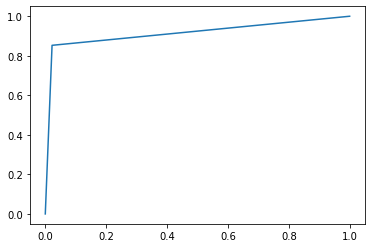

Accuracy score  0.9292035398230089
precision_recall_fscore_support
 (array([0.92424242, 0.93617021]), array([0.953125  , 0.89795918]), array([0.93846154, 0.91666667]), array([64, 49]))
auc score  0.9255420918367347
fpr -  [0.       0.046875 1.      ]
tpr -  [0.         0.89795918 1.        ]


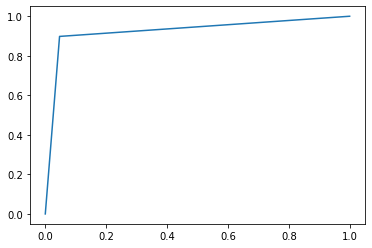

Accuracy score  0.9823008849557522
precision_recall_fscore_support
 (array([0.97368421, 1.        ]), array([1.        , 0.94871795]), array([0.98666667, 0.97368421]), array([74, 39]))
auc score  0.9743589743589743
fpr -  [0. 0. 1.]
tpr -  [0.         0.94871795 1.        ]


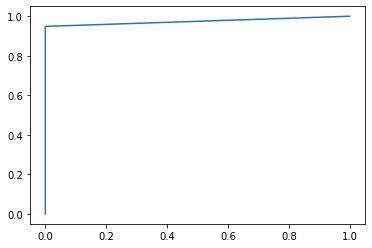

Accuracy score  0.9557522123893806
precision_recall_fscore_support
 (array([0.96428571, 0.93103448]), array([0.97590361, 0.9       ]), array([0.97005988, 0.91525424]), array([83, 30]))
auc score  0.9379518072289157
fpr -  [0.         0.02409639 1.        ]
tpr -  [0.  0.9 1. ]


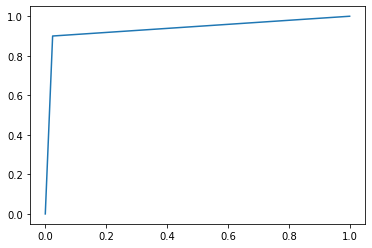

Accuracy score  0.9469026548672567
precision_recall_fscore_support
 (array([0.98837209, 0.81481481]), array([0.94444444, 0.95652174]), array([0.96590909, 0.88      ]), array([90, 23]))
auc score  0.9504830917874396
fpr -  [0.         0.05555556 1.        ]
tpr -  [0.         0.95652174 1.        ]


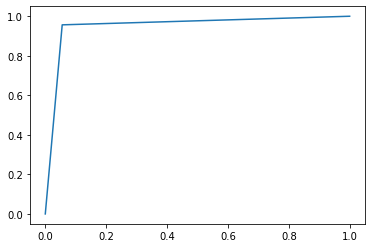

K Fold Cross Validation avg accuracy for k =  7   0.9433628318584071
k =  9
Accuracy score  0.9026548672566371
precision_recall_fscore_support
 (array([0.81481481, 0.98305085]), array([0.97777778, 0.85294118]), array([0.88888889, 0.91338583]), array([45, 68]))
auc score  0.915359477124183
fpr -  [0.         0.02222222 1.        ]
tpr -  [0.         0.85294118 1.        ]


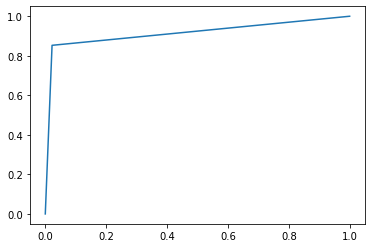

Accuracy score  0.9292035398230089
precision_recall_fscore_support
 (array([0.92424242, 0.93617021]), array([0.953125  , 0.89795918]), array([0.93846154, 0.91666667]), array([64, 49]))
auc score  0.9255420918367347
fpr -  [0.       0.046875 1.      ]
tpr -  [0.         0.89795918 1.        ]


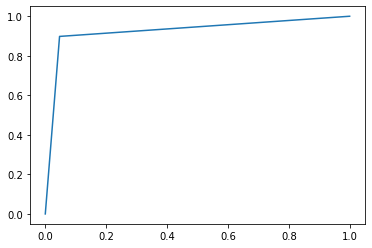

Accuracy score  0.9823008849557522
precision_recall_fscore_support
 (array([0.97368421, 1.        ]), array([1.        , 0.94871795]), array([0.98666667, 0.97368421]), array([74, 39]))
auc score  0.9743589743589743
fpr -  [0. 0. 1.]
tpr -  [0.         0.94871795 1.        ]


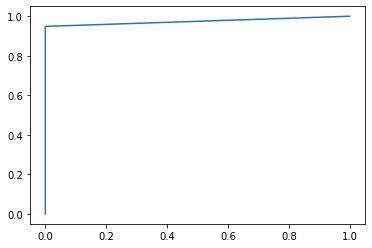

Accuracy score  0.9469026548672567
precision_recall_fscore_support
 (array([0.96385542, 0.9       ]), array([0.96385542, 0.9       ]), array([0.96385542, 0.9       ]), array([83, 30]))
auc score  0.9319277108433734
fpr -  [0.         0.03614458 1.        ]
tpr -  [0.  0.9 1. ]


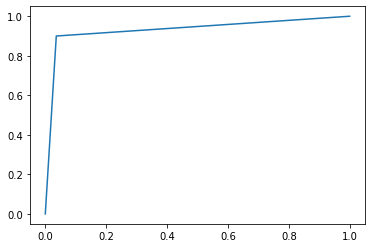

Accuracy score  0.9469026548672567
precision_recall_fscore_support
 (array([0.98837209, 0.81481481]), array([0.94444444, 0.95652174]), array([0.96590909, 0.88      ]), array([90, 23]))
auc score  0.9504830917874396
fpr -  [0.         0.05555556 1.        ]
tpr -  [0.         0.95652174 1.        ]


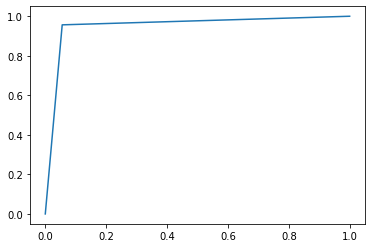

K Fold Cross Validation avg accuracy for k =  9   0.9415929203539823
k =  11
Accuracy score  0.8938053097345132
precision_recall_fscore_support
 (array([0.8       , 0.98275862]), array([0.97777778, 0.83823529]), array([0.88     , 0.9047619]), array([45, 68]))
auc score  0.9080065359477124
fpr -  [0.         0.02222222 1.        ]
tpr -  [0.         0.83823529 1.        ]


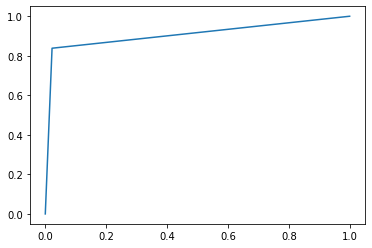

Accuracy score  0.9292035398230089
precision_recall_fscore_support
 (array([0.92424242, 0.93617021]), array([0.953125  , 0.89795918]), array([0.93846154, 0.91666667]), array([64, 49]))
auc score  0.9255420918367347
fpr -  [0.       0.046875 1.      ]
tpr -  [0.         0.89795918 1.        ]


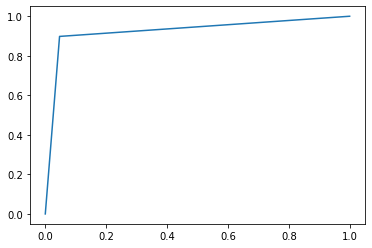

Accuracy score  0.9823008849557522
precision_recall_fscore_support
 (array([0.97368421, 1.        ]), array([1.        , 0.94871795]), array([0.98666667, 0.97368421]), array([74, 39]))
auc score  0.9743589743589743
fpr -  [0. 0. 1.]
tpr -  [0.         0.94871795 1.        ]


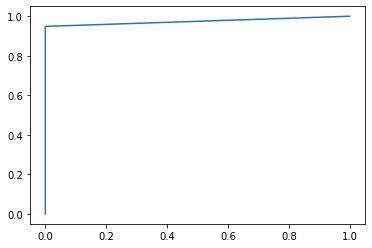

Accuracy score  0.9557522123893806
precision_recall_fscore_support
 (array([0.96428571, 0.93103448]), array([0.97590361, 0.9       ]), array([0.97005988, 0.91525424]), array([83, 30]))
auc score  0.9379518072289157
fpr -  [0.         0.02409639 1.        ]
tpr -  [0.  0.9 1. ]


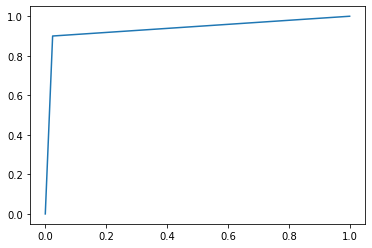

Accuracy score  0.9380530973451328
precision_recall_fscore_support
 (array([0.98823529, 0.78571429]), array([0.93333333, 0.95652174]), array([0.96     , 0.8627451]), array([90, 23]))
auc score  0.9449275362318841
fpr -  [0.         0.06666667 1.        ]
tpr -  [0.         0.95652174 1.        ]


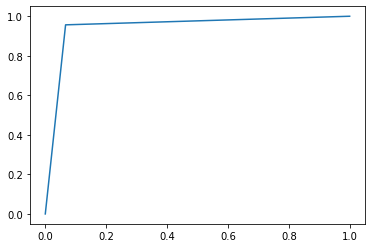

K Fold Cross Validation avg accuracy for k =  11   0.9398230088495574
k =  13
Accuracy score  0.8849557522123894
precision_recall_fscore_support
 (array([0.78571429, 0.98245614]), array([0.97777778, 0.82352941]), array([0.87128713, 0.896     ]), array([45, 68]))
auc score  0.9006535947712417
fpr -  [0.         0.02222222 1.        ]
tpr -  [0.         0.82352941 1.        ]


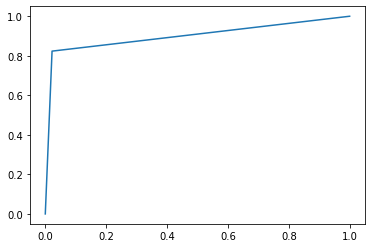

Accuracy score  0.9292035398230089
precision_recall_fscore_support
 (array([0.92424242, 0.93617021]), array([0.953125  , 0.89795918]), array([0.93846154, 0.91666667]), array([64, 49]))
auc score  0.9255420918367347
fpr -  [0.       0.046875 1.      ]
tpr -  [0.         0.89795918 1.        ]


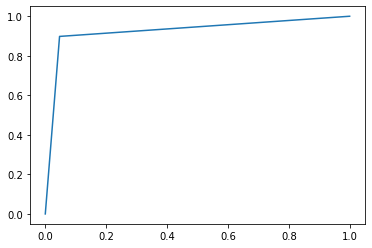

Accuracy score  0.9823008849557522
precision_recall_fscore_support
 (array([0.97368421, 1.        ]), array([1.        , 0.94871795]), array([0.98666667, 0.97368421]), array([74, 39]))
auc score  0.9743589743589743
fpr -  [0. 0. 1.]
tpr -  [0.         0.94871795 1.        ]


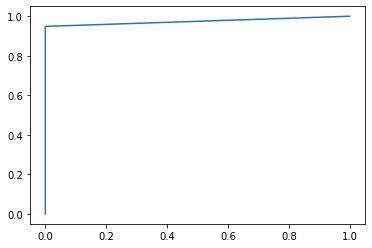

Accuracy score  0.9557522123893806
precision_recall_fscore_support
 (array([0.96428571, 0.93103448]), array([0.97590361, 0.9       ]), array([0.97005988, 0.91525424]), array([83, 30]))
auc score  0.9379518072289157
fpr -  [0.         0.02409639 1.        ]
tpr -  [0.  0.9 1. ]


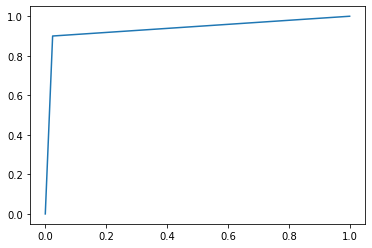

Accuracy score  0.9380530973451328
precision_recall_fscore_support
 (array([0.98823529, 0.78571429]), array([0.93333333, 0.95652174]), array([0.96     , 0.8627451]), array([90, 23]))
auc score  0.9449275362318841
fpr -  [0.         0.06666667 1.        ]
tpr -  [0.         0.95652174 1.        ]


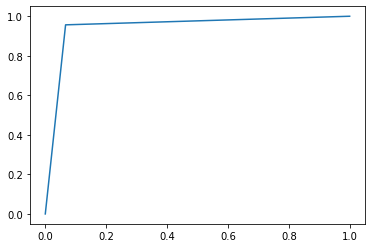

K Fold Cross Validation avg accuracy for k =  13   0.9380530973451326
k =  15
Accuracy score  0.8761061946902655
precision_recall_fscore_support
 (array([0.77192982, 0.98214286]), array([0.97777778, 0.80882353]), array([0.8627451 , 0.88709677]), array([45, 68]))
auc score  0.8933006535947712
fpr -  [0.         0.02222222 1.        ]
tpr -  [0.         0.80882353 1.        ]


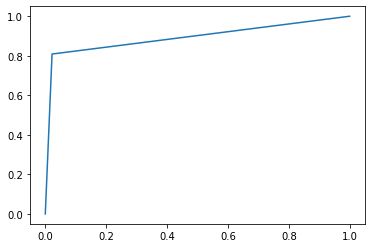

Accuracy score  0.9292035398230089
precision_recall_fscore_support
 (array([0.92424242, 0.93617021]), array([0.953125  , 0.89795918]), array([0.93846154, 0.91666667]), array([64, 49]))
auc score  0.9255420918367347
fpr -  [0.       0.046875 1.      ]
tpr -  [0.         0.89795918 1.        ]


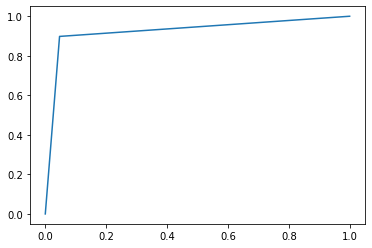

Accuracy score  0.9823008849557522
precision_recall_fscore_support
 (array([0.97368421, 1.        ]), array([1.        , 0.94871795]), array([0.98666667, 0.97368421]), array([74, 39]))
auc score  0.9743589743589743
fpr -  [0. 0. 1.]
tpr -  [0.         0.94871795 1.        ]


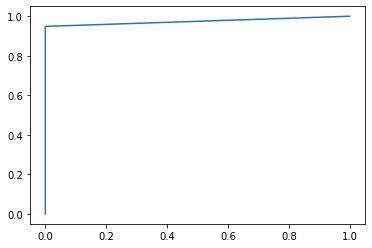

Accuracy score  0.9557522123893806
precision_recall_fscore_support
 (array([0.96428571, 0.93103448]), array([0.97590361, 0.9       ]), array([0.97005988, 0.91525424]), array([83, 30]))
auc score  0.9379518072289157
fpr -  [0.         0.02409639 1.        ]
tpr -  [0.  0.9 1. ]


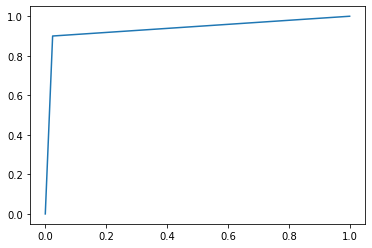

Accuracy score  0.9557522123893806
precision_recall_fscore_support
 (array([0.98850575, 0.84615385]), array([0.95555556, 0.95652174]), array([0.97175141, 0.89795918]), array([90, 23]))
auc score  0.9560386473429953
fpr -  [0.         0.04444444 1.        ]
tpr -  [0.         0.95652174 1.        ]


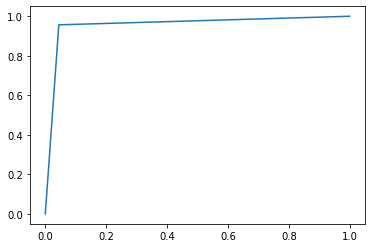

K Fold Cross Validation avg accuracy for k =  15   0.9398230088495574
k =  17
Accuracy score  0.8495575221238938
precision_recall_fscore_support
 (array([0.73333333, 0.98113208]), array([0.97777778, 0.76470588]), array([0.83809524, 0.85950413]), array([45, 68]))
auc score  0.8712418300653594
fpr -  [0.         0.02222222 1.        ]
tpr -  [0.         0.76470588 1.        ]


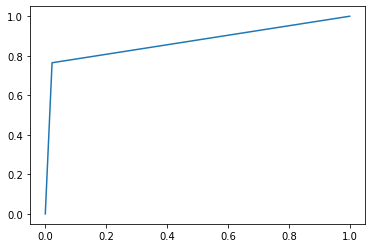

Accuracy score  0.9292035398230089
precision_recall_fscore_support
 (array([0.92424242, 0.93617021]), array([0.953125  , 0.89795918]), array([0.93846154, 0.91666667]), array([64, 49]))
auc score  0.9255420918367347
fpr -  [0.       0.046875 1.      ]
tpr -  [0.         0.89795918 1.        ]


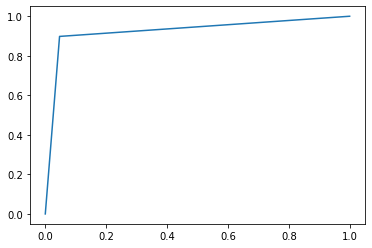

Accuracy score  0.9823008849557522
precision_recall_fscore_support
 (array([0.97368421, 1.        ]), array([1.        , 0.94871795]), array([0.98666667, 0.97368421]), array([74, 39]))
auc score  0.9743589743589743
fpr -  [0. 0. 1.]
tpr -  [0.         0.94871795 1.        ]


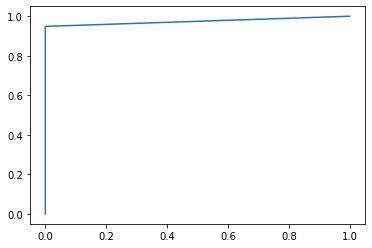

Accuracy score  0.9557522123893806
precision_recall_fscore_support
 (array([0.96428571, 0.93103448]), array([0.97590361, 0.9       ]), array([0.97005988, 0.91525424]), array([83, 30]))
auc score  0.9379518072289157
fpr -  [0.         0.02409639 1.        ]
tpr -  [0.  0.9 1. ]


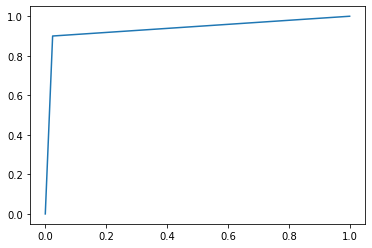

Accuracy score  0.9557522123893806
precision_recall_fscore_support
 (array([0.98850575, 0.84615385]), array([0.95555556, 0.95652174]), array([0.97175141, 0.89795918]), array([90, 23]))
auc score  0.9560386473429953
fpr -  [0.         0.04444444 1.        ]
tpr -  [0.         0.95652174 1.        ]


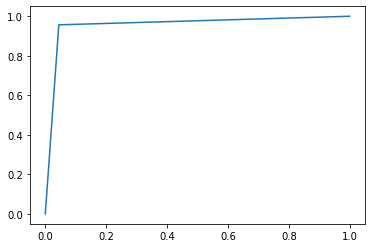

K Fold Cross Validation avg accuracy for k =  17   0.9345132743362832
k =  19
Accuracy score  0.8495575221238938
precision_recall_fscore_support
 (array([0.73333333, 0.98113208]), array([0.97777778, 0.76470588]), array([0.83809524, 0.85950413]), array([45, 68]))
auc score  0.8712418300653594
fpr -  [0.         0.02222222 1.        ]
tpr -  [0.         0.76470588 1.        ]


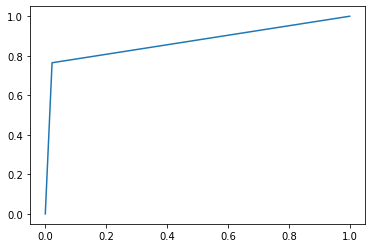

Accuracy score  0.9292035398230089
precision_recall_fscore_support
 (array([0.92424242, 0.93617021]), array([0.953125  , 0.89795918]), array([0.93846154, 0.91666667]), array([64, 49]))
auc score  0.9255420918367347
fpr -  [0.       0.046875 1.      ]
tpr -  [0.         0.89795918 1.        ]


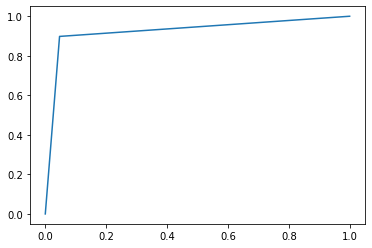

Accuracy score  0.9823008849557522
precision_recall_fscore_support
 (array([0.97368421, 1.        ]), array([1.        , 0.94871795]), array([0.98666667, 0.97368421]), array([74, 39]))
auc score  0.9743589743589743
fpr -  [0. 0. 1.]
tpr -  [0.         0.94871795 1.        ]


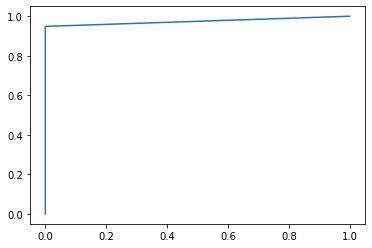

Accuracy score  0.9557522123893806
precision_recall_fscore_support
 (array([0.96428571, 0.93103448]), array([0.97590361, 0.9       ]), array([0.97005988, 0.91525424]), array([83, 30]))
auc score  0.9379518072289157
fpr -  [0.         0.02409639 1.        ]
tpr -  [0.  0.9 1. ]


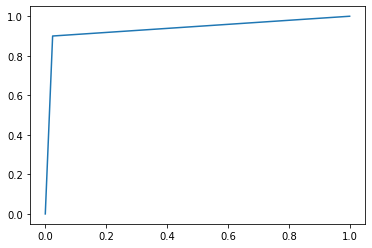

Accuracy score  0.9469026548672567
precision_recall_fscore_support
 (array([0.97727273, 0.84      ]), array([0.95555556, 0.91304348]), array([0.96629213, 0.875     ]), array([90, 23]))
auc score  0.9342995169082126
fpr -  [0.         0.04444444 1.        ]
tpr -  [0.         0.91304348 1.        ]


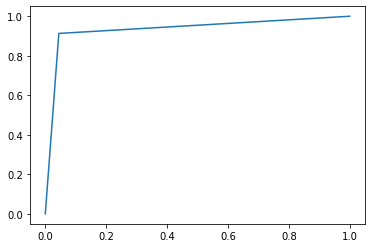

K Fold Cross Validation avg accuracy for k =  19   0.9327433628318584
k =  21
Accuracy score  0.8495575221238938
precision_recall_fscore_support
 (array([0.73333333, 0.98113208]), array([0.97777778, 0.76470588]), array([0.83809524, 0.85950413]), array([45, 68]))
auc score  0.8712418300653594
fpr -  [0.         0.02222222 1.        ]
tpr -  [0.         0.76470588 1.        ]


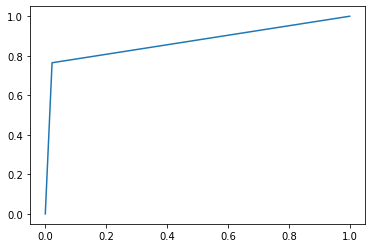

Accuracy score  0.9203539823008849
precision_recall_fscore_support
 (array([0.91044776, 0.93478261]), array([0.953125  , 0.87755102]), array([0.93129771, 0.90526316]), array([64, 49]))
auc score  0.9153380102040816
fpr -  [0.       0.046875 1.      ]
tpr -  [0.         0.87755102 1.        ]


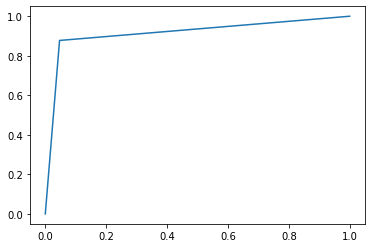

Accuracy score  0.9823008849557522
precision_recall_fscore_support
 (array([0.97368421, 1.        ]), array([1.        , 0.94871795]), array([0.98666667, 0.97368421]), array([74, 39]))
auc score  0.9743589743589743
fpr -  [0. 0. 1.]
tpr -  [0.         0.94871795 1.        ]


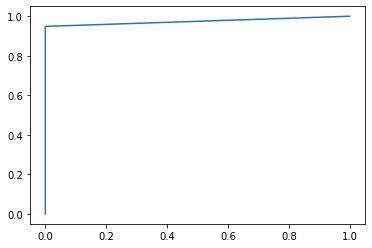

Accuracy score  0.9557522123893806
precision_recall_fscore_support
 (array([0.96428571, 0.93103448]), array([0.97590361, 0.9       ]), array([0.97005988, 0.91525424]), array([83, 30]))
auc score  0.9379518072289157
fpr -  [0.         0.02409639 1.        ]
tpr -  [0.  0.9 1. ]


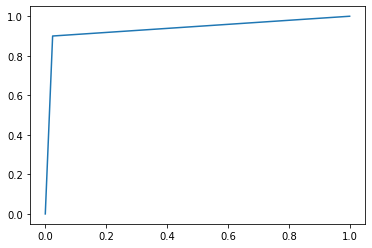

Accuracy score  0.9469026548672567
precision_recall_fscore_support
 (array([0.97727273, 0.84      ]), array([0.95555556, 0.91304348]), array([0.96629213, 0.875     ]), array([90, 23]))
auc score  0.9342995169082126
fpr -  [0.         0.04444444 1.        ]
tpr -  [0.         0.91304348 1.        ]


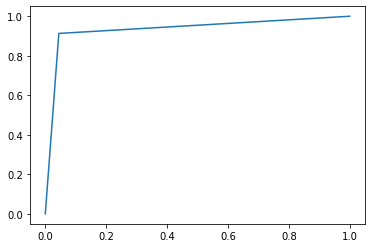

K Fold Cross Validation avg accuracy for k =  21   0.9309734513274335
k =  23
Accuracy score  0.8495575221238938
precision_recall_fscore_support
 (array([0.73333333, 0.98113208]), array([0.97777778, 0.76470588]), array([0.83809524, 0.85950413]), array([45, 68]))
auc score  0.8712418300653594
fpr -  [0.         0.02222222 1.        ]
tpr -  [0.         0.76470588 1.        ]


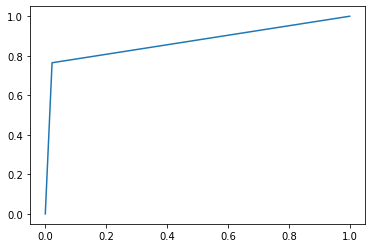

Accuracy score  0.911504424778761
precision_recall_fscore_support
 (array([0.89705882, 0.93333333]), array([0.953125  , 0.85714286]), array([0.92424242, 0.89361702]), array([64, 49]))
auc score  0.9051339285714286
fpr -  [0.       0.046875 1.      ]
tpr -  [0.         0.85714286 1.        ]


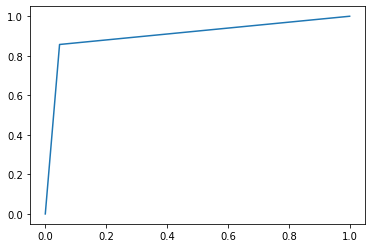

Accuracy score  0.9823008849557522
precision_recall_fscore_support
 (array([0.97368421, 1.        ]), array([1.        , 0.94871795]), array([0.98666667, 0.97368421]), array([74, 39]))
auc score  0.9743589743589743
fpr -  [0. 0. 1.]
tpr -  [0.         0.94871795 1.        ]


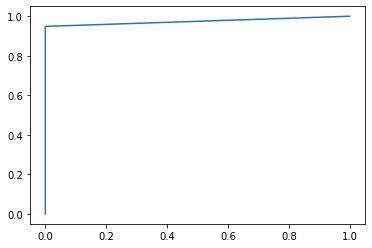

Accuracy score  0.9557522123893806
precision_recall_fscore_support
 (array([0.96428571, 0.93103448]), array([0.97590361, 0.9       ]), array([0.97005988, 0.91525424]), array([83, 30]))
auc score  0.9379518072289157
fpr -  [0.         0.02409639 1.        ]
tpr -  [0.  0.9 1. ]


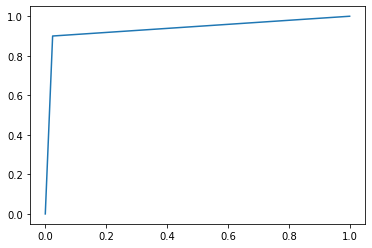

Accuracy score  0.9469026548672567
precision_recall_fscore_support
 (array([0.97727273, 0.84      ]), array([0.95555556, 0.91304348]), array([0.96629213, 0.875     ]), array([90, 23]))
auc score  0.9342995169082126
fpr -  [0.         0.04444444 1.        ]
tpr -  [0.         0.91304348 1.        ]


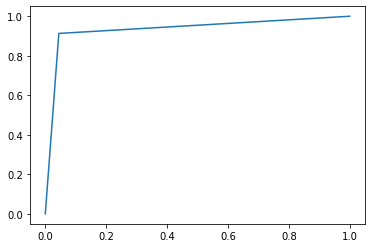

K Fold Cross Validation avg accuracy for k =  23   0.9292035398230087
k =  25
Accuracy score  0.8495575221238938
precision_recall_fscore_support
 (array([0.73333333, 0.98113208]), array([0.97777778, 0.76470588]), array([0.83809524, 0.85950413]), array([45, 68]))
auc score  0.8712418300653594
fpr -  [0.         0.02222222 1.        ]
tpr -  [0.         0.76470588 1.        ]


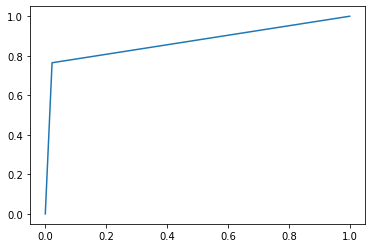

Accuracy score  0.911504424778761
precision_recall_fscore_support
 (array([0.89705882, 0.93333333]), array([0.953125  , 0.85714286]), array([0.92424242, 0.89361702]), array([64, 49]))
auc score  0.9051339285714286
fpr -  [0.       0.046875 1.      ]
tpr -  [0.         0.85714286 1.        ]


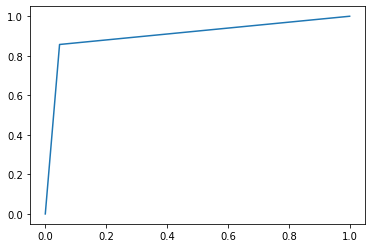

Accuracy score  0.9734513274336283
precision_recall_fscore_support
 (array([0.96103896, 1.        ]), array([1.        , 0.92307692]), array([0.98013245, 0.96      ]), array([74, 39]))
auc score  0.9615384615384616
fpr -  [0. 0. 1.]
tpr -  [0.         0.92307692 1.        ]


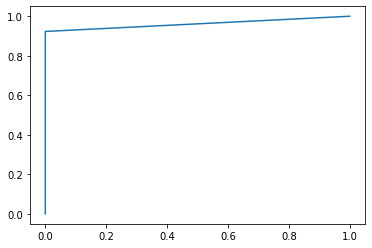

Accuracy score  0.9557522123893806
precision_recall_fscore_support
 (array([0.96428571, 0.93103448]), array([0.97590361, 0.9       ]), array([0.97005988, 0.91525424]), array([83, 30]))
auc score  0.9379518072289157
fpr -  [0.         0.02409639 1.        ]
tpr -  [0.  0.9 1. ]


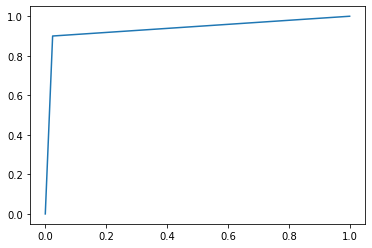

Accuracy score  0.9557522123893806
precision_recall_fscore_support
 (array([0.97752809, 0.875     ]), array([0.96666667, 0.91304348]), array([0.97206704, 0.89361702]), array([90, 23]))
auc score  0.9398550724637682
fpr -  [0.         0.03333333 1.        ]
tpr -  [0.         0.91304348 1.        ]


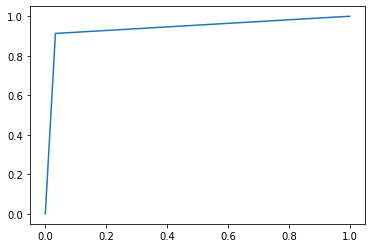

K Fold Cross Validation avg accuracy for k =  25   0.9292035398230087
k =  27
Accuracy score  0.8495575221238938
precision_recall_fscore_support
 (array([0.73333333, 0.98113208]), array([0.97777778, 0.76470588]), array([0.83809524, 0.85950413]), array([45, 68]))
auc score  0.8712418300653594
fpr -  [0.         0.02222222 1.        ]
tpr -  [0.         0.76470588 1.        ]


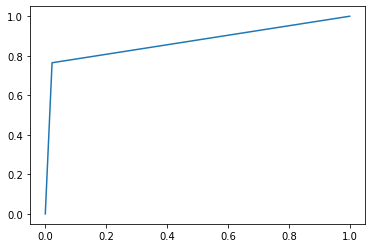

Accuracy score  0.911504424778761
precision_recall_fscore_support
 (array([0.89705882, 0.93333333]), array([0.953125  , 0.85714286]), array([0.92424242, 0.89361702]), array([64, 49]))
auc score  0.9051339285714286
fpr -  [0.       0.046875 1.      ]
tpr -  [0.         0.85714286 1.        ]


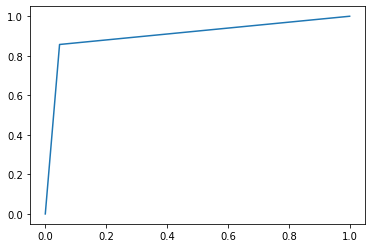

Accuracy score  0.9734513274336283
precision_recall_fscore_support
 (array([0.96103896, 1.        ]), array([1.        , 0.92307692]), array([0.98013245, 0.96      ]), array([74, 39]))
auc score  0.9615384615384616
fpr -  [0. 0. 1.]
tpr -  [0.         0.92307692 1.        ]


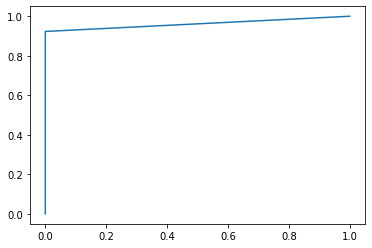

Accuracy score  0.9557522123893806
precision_recall_fscore_support
 (array([0.96428571, 0.93103448]), array([0.97590361, 0.9       ]), array([0.97005988, 0.91525424]), array([83, 30]))
auc score  0.9379518072289157
fpr -  [0.         0.02409639 1.        ]
tpr -  [0.  0.9 1. ]


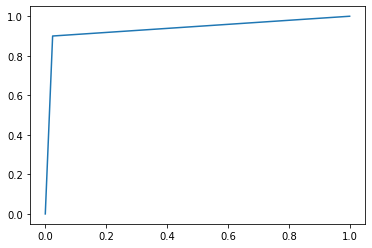

Accuracy score  0.9646017699115044
precision_recall_fscore_support
 (array([0.97777778, 0.91304348]), array([0.97777778, 0.91304348]), array([0.97777778, 0.91304348]), array([90, 23]))
auc score  0.9454106280193236
fpr -  [0.         0.02222222 1.        ]
tpr -  [0.         0.91304348 1.        ]


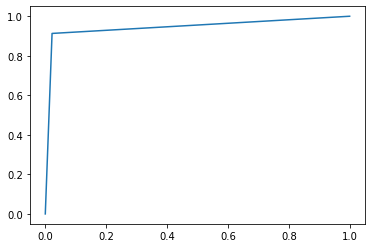

K Fold Cross Validation avg accuracy for k =  27   0.9309734513274336


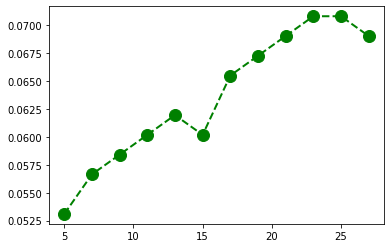

In [20]:
k = np.arange(5, 29, 2)
error = [ 1 - k_cross_validate(X, y, ki) for ki in k ]

fig, ax = plt.subplots(1)
ax.plot(k, error, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)